# Project Final Report 
##### Group: project-005-002
##### Group members: Adrian Fung (25748062) Pirahnavi Balasothy, Guilly Lozano, Angad Nahal

### Notebook content:
1. Introduction
2. Methods & Results
3. Discussion

## Introduction:
### Background Information
A group in CS at UBC is interested in understanding how people play video games. They are recording Minecraft play sessions and want to know which “kinds” of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts. 


### Project questions
The broad problem we aimed to address for our project was "We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.".

We then devised a more specific question: 
__Can age and played hours determine user's subscription status, and how can we use this information to improve recruiting efforts?__
We will be using KNN classification methods in orderto answer this question.

### Data Description:

We will be using the player dataset, there are 196 Observations, and 7 columns with different variables, they include:
| Variable Name  | Type                | Description |
|---------------|---------------------|-------------|
| experience    | Categorical    | User's experience level |
| subscribe     | Boolean     | Whether the user is a subscriber |
| hashedEmail   | String        | Hashed user email for anonymization. |
| played_hours  | Numeric        | Total hours played |
| name          | String        | User's first name. |
| gender        | Categorical    | User's gender|
| Age           | Numeric        | User’s age. |


## Summary Statistics for Data

- Age: Range appears to be from 9 to 17 years

- Played Hours: Ranges from 0 to a maximum value, Mostly under 1 hour

- Subscribe: Majority are subscribed

- Gender Distribution: Predominantly male and female

- Experience Distribution: Mostly amateur, veteran, beginner and regular, with fewer pros

## Method and Results

### Methods:
We will use KNN classification to determine whether a player's age and played hours can predict their subscription status (subscribed or not). KNN classification allows us to:

- Group players based on similarities in their age and played hours.
- Classify new players as either likely to subscribe (high engagement) or unlikely to subscribe (low engagement) based on their nearest neighbors.
- Tune the model by selecting the best K value to optimize classification accuracy.
- Use the trained model to predict which players are likely to be dedicated and improve recruitment efforts.

We chose age and played hours as predictors because they balance demographic and engagement factors. Age may influence gaming habits across different demographics, while played hours can directly reflect how engaged and invested a player is in the game. By combining these two features, we can gain insights into which characteristics are most associated with players who are more likely to subscribe.

### Steps to Process and Analyze the Data:
__1. Data Wrangling__
- Define the target variable: Use the current subscription status (1 for subscribed, 0 for not subscribed) as the target.
- Feature selection: Focus on age and played hours as the primary predictors.
- Preprocessing: Handle any missing data and filter out unnecessary columns.
  
__2. Feature Engineering__
- Age: Keep age as a numeric feature (no transformation needed unless scaling is required for KNN).
- Played Hours: Keep played hours as a numeric feature.
- Subscription Status: Ensure the subscription status is a binary variable (1 for subscribed, 0 for not).

__3. Data Splitting & Preprocessing__
- Split the data into training (75%) and testing (25%) sets.
- Normalize or standardize age and played hours if necessary to improve KNN performance (as KNN is sensitive to the scale of the features).

__4. Parameter Tuning__
- Perform cross-validation to determine the optimal K value.
- Test different K values (e.g., K = 3, 5, 7, 10) to identify the best value for accurate classification.

__5. KNN Classification__
- Train the K-Nearest Neighbors (KNN) classifier using age and played hours as predictors.
- Predict the subscription status (whether the player is likely to subscribe or not) based on these features.

__6. Model Evaluation__
- Assess the model’s performance using metrics such as accuracy, precision, recall, and F1-score.
- Evaluate if age and played hours are sufficient to accurately classify players’ subscription behavior.

__7. Recruitment Strategy__
- Use the trained model to identify players most likely to subscribe, based on their age and played hours.
- Target those who are more likely to become subscribers for tailored recruitment efforts and improve retention.


### Loading and Wrangling data

First we need to load the essential R packages in order to be able to develop a classifier.

In [9]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(tidymodels)
library(yardstick)
library(themis)
options(repr.matrix.max.rows = 6)

Then, we nead to read in the .csv from the github repository.

In [8]:
players <- read_csv("https://raw.githubusercontent.com/fadrianlh/dsci-100-project-005-22/refs/heads/main/players%20(1).csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


First, we created a graph in order to visualize the relationship between the average numbers of hours a person has played and their subsrciption status as it is relevant to how we will address our question.

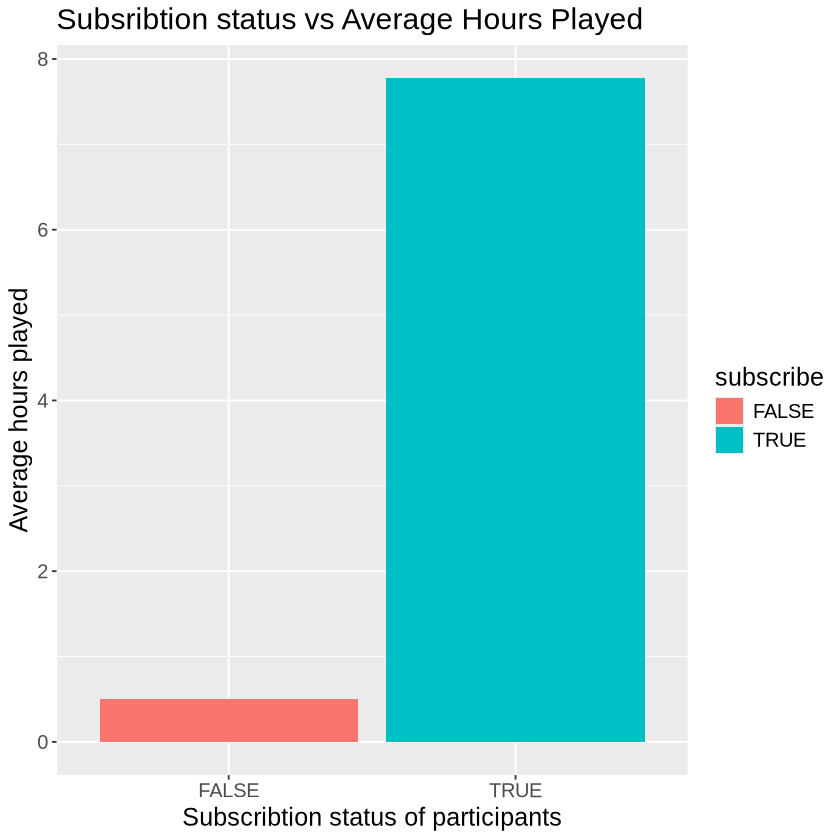

In [11]:
subscribe_vs_hours <- players |>
  group_by(subscribe) |> 
  summarise(average_hours = mean(played_hours, na.rm = TRUE)) |>
  ggplot(aes(x = subscribe, y = average_hours, fill = subscribe)) + 
  geom_bar(stat = "identity")+ 
  xlab("Subscribtion status of participants") +
  ylab("Average hours played")+
  ggtitle("Subsribtion status vs Average Hours Played") +
  theme(text = element_text(size = 15))

subscribe_vs_hours

This bar plot shows that players who have subscribed have a significantly higher average amount of playtime as opposed to players who did not subscribe.

The next step was to tidy the dataset. This was done by filtering our all the rows where played_hours = 0. The subscribe variable was then converted into a factor in order to represent the subscription status as a categorical variable. We proceeded to select only the necessary columns for our data analysis and dropped all NA valuse to remove missing values.

In [13]:
players_tidy <- players |> 
  filter(played_hours != 0) |>
  mutate(subscribe = factor(subscribe)) |>
  select(experience, subscribe, played_hours, Age) |>
  drop_na()

players_tidy

experience,subscribe,played_hours,Age
<chr>,<fct>,<dbl>,<dbl>
Pro,TRUE,30.3,9
Veteran,TRUE,3.8,17
Amateur,TRUE,0.7,21
⋮,⋮,⋮,⋮
Veteran,TRUE,0.1,44
Veteran,FALSE,0.3,22
Amateur,FALSE,2.3,17


Before we do any further analysis Below are steps to get a general sense of how the split of TRUE to FALSE is for subscription status in the given dataset in ordfer to check for any class imbalances.

In [14]:
subscription_level<-players_tidy|>
count(subscribe)
subscription_level

subscribe,n
<fct>,<int>
FALSE,25
TRUE,84


The table shows that there is an excess of TRUE readings. This is an issue that needs to be addressed as TRUE will be overvalued when the model is trained, leading to the model most likely only ever predicting TRUE and thereby misrepresenting the true data. As such, the FALSE values will be stepped up using step_upsample later in our analysis, while ensuring that TRUE values are still scaled the same.

Now we will proceed with our analysis to determine the optimal k-value for the K-Nearest Neighbors (KNN) model. The code below involves tuning k through cross-validation, evaluating model performance across different values, and selecting the one that yields the highest accuracy. Once the optimal k-value is identified, we will use it to build our final classification model and assess its effectiveness in predicting player dedication.

In [15]:
set.seed(123)
players_split <- initial_split(players_tidy, prop = 0.75, strata = subscribe)  
players_train <- training(players_split)   
players_test <- testing(players_split)


players_vfold <- vfold_cv(players_train, v = 5, strata = subscribe)
players_recipe <- recipe(subscribe ~ played_hours + Age, data = players_train) |>
   step_upsample(subscribe, over_ratio = 1, skip = TRUE) |>
   step_scale(all_predictors()) |>
   step_center(all_predictors())

players_recipe

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
        set_engine("kknn") |>
        set_mode("classification")
knn_tune

k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

knn_results <- workflow() |>
      add_recipe(players_recipe) |>
      add_model(knn_tune) |>
      tune_grid(resamples = players_vfold, grid = k_vals) |>
      collect_metrics()


knn_results



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Up-sampling based on: subscribe

• Scaling for: all_predictors()

• Centering for: all_predictors()



K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6603922,5,0.05914422,Preprocessor1_Model01
1,roc_auc,binary,0.5717949,5,0.09176187,Preprocessor1_Model01
2,accuracy,binary,0.6603922,5,0.05914422,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
9,roc_auc,binary,0.4987179,5,0.10171445,Preprocessor1_Model09
10,accuracy,binary,0.4909804,5,0.04126787,Preprocessor1_Model10
10,roc_auc,binary,0.5160256,5,0.08980716,Preprocessor1_Model10


In this analysis we implemented a K-Nearest Neighbors (KNN) model in order to classify players using subscribtion based on their age and played_hours. We began by splitting the dataset into training (75%) and testing (25%) sets while maintaining the class distribution through stratified sampling. To ensure a strong evaluation, we applied 5-fold cross-validation on the training data. Before modeling, we standardized the predictors by centering, upsampling and scaling them to ensure they contributed equally to distance calculations. We then defined a KNN model where the number of neighbors (k) was treated as a tunable hyperparameter. A grid search was conducted across k-values ranging from 1 to 10, evaluating performance through cross-validation. The results were collected to identify the optimal k-value, balancing accuracy and generalization. This process ensured that our model was both well-tuned and capable of effectively distinguishing between casual and dedicated players.

The code below plots KNN accuracy against different K values. It filters accuracy results, then creates a scatter plot with a connecting line. The x-axis ranges from 0 to 10, and the y-axis is limited to 0.4–1.0 to highlight accuracy trends.

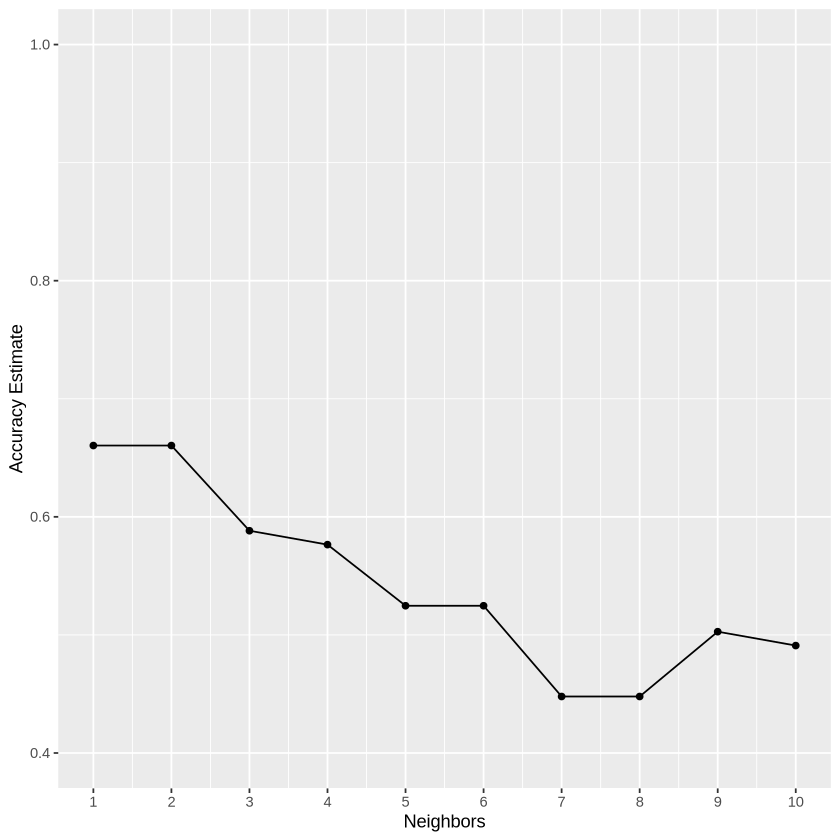

In [16]:
accuracies <- knn_results |> 
      filter(.metric == "accuracy")

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 10, by = 1)) +  # adjusting the x-axis
      scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis


accuracy_versus_k

This graph shows that almost all k values from 1 to 2 yielded high results of accuracy. We chose to use 2 neighbours as 1 may lead to overfitting.

After obtaining k = 2 as the optimal value, we created a KNN model with 2 neighbors and a rectangular weight function using the "kknn" engine and classification mode. After defining the model, we created a workflow by adding the recipe and model and fitted the model on the training dataset (players_train). Predictions were made on the test set (players_test) and combined with the test data for evaluation. 

In [17]:
library(yardstick)
library(forcats)
players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 2)|>
set_engine("kknn")|>
set_mode("classification")

players_fit <- workflow() |>
             add_recipe(players_recipe) |>
             add_model(players_spec) |>
             fit(data = players_train)
players_fit

players_predictions <- predict(players_fit, players_test) |> 
                       bind_cols(players_test) 

players_predictions

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
3 Recipe Steps

• step_upsample()
• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(2,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2142857
Best kernel: rectangular
Best k: 2

.pred_class,experience,subscribe,played_hours,Age
<fct>,<chr>,<fct>,<dbl>,<dbl>
TRUE,Pro,TRUE,30.3,9
FALSE,Veteran,TRUE,3.8,17
TRUE,Amateur,TRUE,0.5,17
⋮,⋮,⋮,⋮,⋮
FALSE,Amateur,TRUE,0.3,17
FALSE,Veteran,TRUE,0.1,17
TRUE,Veteran,TRUE,0.1,44


We then calculated performance metrics such as precision and recall by comparing predicted classes (.pred_class) to the true values (subscribe). Precision measures the proportion of true positive predictions, while recall evaluates the proportion of true positives among all actual positive cases. These metrics assess the model’s ability to classify dedicated versus casual players.

In [18]:
metrics(players_predictions, truth = subscribe, estimate = .pred_class)

conf_mat(players_predictions, truth = subscribe, estimate = .pred_class)

#calculating precision
precision(players_predictions, truth = subscribe, estimate = .pred_class, event_level="second")



# Calculate recall
recall(players_predictions, truth = subscribe, estimate = .pred_class, event_level="second")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.60714286
kap,binary,0.08333333


          Truth
Prediction FALSE TRUE
     FALSE     3    7
     TRUE      4   14

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.7777778


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.6666667


The model achieved an accuracy level of __61%__, a precision level of __78%__, and a recall level of __67%__. These values indicate the model's ability to balance the detection of true positives while maintaining a reasonable rate of false positives.

## Discussion

### Summary:

The question the data was aimed to answer was whether a user's age and played hours could be used to determine their subscription status and how this could help developers in choosing players that would provide the most data. The bar graph displayed indicated that on average, users who were subscribed played more than users not subscribed by a factor of around 16x (0.5 hours to 8 hours). This implies that developers are more likely to get more data from players who are subscribed, meaning recruting efforts should be targeted towards these types of users based off expected results.

The results of our classifier indicate that predicting subscription status based on a user’s played hours and age is a reasonably reliable method. With a moderate accuracy of 61%, a recall of 78%, and a precision of 67%, this approach could potentially help developers improve recruitment strategies by identifying users who are more likely to contribute substantial gameplay data.

### Expectations vs Truth:

The results don't necessarily align with what is expected intuitively. Subscribed players would be more enthusiastic about video games (likely at a younger age) and would place more value in providing data (having more considerable played hours). As such having a highly successful prediction algorithm that predicts subscription off played hours and age was expected. This strong relationship between the variables meant the accuracy was expected to be high, which is not precisely what the results show. The accuracy was shown to be 61%, with precision at 78% and recall being 67%. These high values show the capability and reliability of the algorithm as well as the ability to predict subscription levels based on played hours and age.

Potential errors in the results could stem from not considering other factors such as gender and experience level. These predictors could play a factor in determining subscription level, however as they were excluded in this project, their impact remains unknown. Additionally, factors beyond the scope of the data could impact subscription status which the model cannot account for such as financial issues, also leading to a lower accuracy.

### Impact:

These findings have a significant impact on not just this specific dataset, but others similar to it in the gaming field. The results show that subscription level cannot be consistently determined based on only a user's played hours and age. These findings inform developers that unfortunately a strong relationship based on subscription and how much data a user can provide cannot be founded meaning a prediction model based on these parameters is too unreliable to be used in scouting efforts. This is useful data however as it means developers won't mistakingly relate these variables leading to unexpected user data, and shows that other user information may need to be collected to develop a successful prediction model with high accuracy.

### Further Questions:

Further questions that coould be explored in order to gain more insights are:
1. "Is there a relationship between subscription and predictors of gender and experience? If so, what is this relationship and how may it be useful to developers when compared to the findings of this project?"
2. "Between age and played hours, which variable has a greater impact on determining subscription status and to what degree?"
3. "Would a prediction model using all possible predictors be more useful than a model only using some? Why or why not, and to what extent?"